In [1]:
# 텍스트 분석
# 전처리: 형태소 분리, 품사부착, 불용어 처리, 어간처리, 가중치 도출, (텍스트 표준화 정규화)
# TF, TF-IDF
# 워드 클라우드 및 빈도분석

In [2]:
# TF

In [1]:
# 데이터 불러오기

import pandas as pd

data = pd.read_csv("CNN_Articles_Practice.csv")
data

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,"Jacopo Prisco, CNN",2021-07-15 2:46,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Stephanie Bailey, CNN",2021-05-12 7:52,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 2:51,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"Paul R. La Monica, CNN Business",2022-03-15 9:57,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Reuters,2022-03-15 11:27,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4346,"Ivana Kottasov찼, CNN",2021-11-08 12:22,news,europe,https://www.cnn.com/2021/11/08/europe/czech-pa...,Communists missing from Czech parliament for t...,When the Czech Republic's 200 newly-elected de...,"europe, Communists missing from Czech parliame...","Communists have now left the Czech parliament,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,4347,"George Ramsay, CNN",2021-11-08 17:39,sport,football,https://www.cnn.com/2021/11/08/football/josh-c...,Gay footballer Josh Cavallo says he would be '...,"After becoming the only current, openly gay pl...","football, Gay footballer Josh Cavallo says he ...",Gay footballer Josh Cavallo says he would be '...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,4348,"Ben Westcott, CNN",2021-11-07 0:11,news,australia,https://www.cnn.com/2021/11/06/australia/austr...,Koalas are dying from chlamydia and climate ch...,A silent killer is spreading through Australia...,"australia, Koalas are dying from chlamydia and...","Koalas are dying from chlamydia, and climate c...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,2133,"Ben Church, CNN",2021-04-25 12:56,sport,football,https://www.cnn.com/2021/04/25/football/englis...,English football is set to boycott social medi...,The world of English football is set to unite ...,"football, English football is set to boycott s...",English football is set to boycott social medi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 분석에 사용할 컬럼만 가져오기
# 리스트 : 데이터를 보관하는 기능

text = list(data['Article text'])
text

[' (CNN)Right now, there\'s a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton, Volkswagen\'s trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world\'s first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to se

In [3]:
# 뉴스 기사 모두 몇 개?

len(text)

400

In [4]:
#첫번째 기사 확인

text[0]

' (CNN)Right now, there\'s a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton, Volkswagen\'s trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world\'s first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see

In [7]:
# 형태소 분리, 품사부착

In [ ]:
import nltk # 자연어처리 라이브러리
from nltk.tag import pos_tag #품사를 판별
from nltk import word_tokenize #Tokenization

import nltk
# punkt_tab: 문장 구조를 파악하기 위한 데이터 다운로드
nltk.download('punkt_tab')

import nltk
# averaged_perceptron_tagger_eng: 영어 품사 판별기(Tagger)의 최신 모델 데이터 다운로드
nltk.download('averaged_perceptron_tagger_eng')

# punkt: 단어 토큰화(word_tokenize)를 위해 필요한 표준 라이브러리 다운로드
nltk.download('punkt')
# averaged_perceptron_tagger: 품사 태깅에 필요한 사전과 가중치 데이터 다운로드
nltk.download('averaged_perceptron_tagger')

# text[0]에 저장된 문자열을 단어 단위로 쪼갬
words = word_tokenize(text[0])
# 쪼개진 단어 리스트(words)의 각 요소에 품사를 붙여 튜플 형태로 반환
pos_tag(words)

# NNP : 고유명사
# VB : 동사
# VBP : 동사 현재형
# TO : to전치사
# NN : 명사
# DT : 관형사

# ex. ('Greater', 'NNP') => i[0] = 단어 / i[1] = 품사


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('(', '('),
 ('CNN', 'NNP'),
 (')', ')'),
 ('Right', 'RB'),
 ('now', 'RB'),
 (',', ','),
 ('there', 'EX'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('shortage', 'NN'),
 ('of', 'IN'),
 ('truck', 'NN'),
 ('drivers', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('US', 'NNP'),
 ('and', 'CC'),
 ('worldwide', 'NN'),
 (',', ','),
 ('exacerbated', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('e-commerce', 'NN'),
 ('boom', 'NN'),
 ('brought', 'VBN'),
 ('on', 'IN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('pandemic', 'NN'),
 ('.', '.'),
 ('One', 'CD'),
 ('solution', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('problem', 'NN'),
 ('is', 'VBZ'),
 ('autonomous', 'JJ'),
 ('trucks', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('several', 'JJ'),
 ('companies', 'NNS'),
 ('are', 'VBP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('race', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('to', 'TO'),
 ('launch', 'VB'),
 ('one', 'CD'),
 ('.', '.'),
 ('Among', 'IN'),
 ('them', 'PRP'),
 ('is', 'VBZ'),
 ('San', 'NNP'),
 ('Diego-based

In [7]:
# 불용어 처리
#stop = ['the', 'in', 'of', 'at', 'be', '%']
#하나씩 입력함 -> 불편
#불용어 리스트 사용하면 편함

In [ ]:
#1. NLTK 불용어 리스트

import nltk
from nltk.corpus import stopwords

# NLTK 불용어 데이터 다운로드
nltk.download('stopwords')

# 영어 불용어 세트 불러오기
stop_words_list = stopwords.words('english')

# 내 프로젝트용 txt 파일로 저장하기
with open("English_stop_words1.txt", "w", encoding="utf-8") as f:
    for word in stop_words_list:
        f.write(word + "\n")

print(f"총 {len(stop_words_list)}개의 불용어가 저장되었습니다.")

총 198개의 불용어가 저장되었습니다.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#2. Stopwords ISO에서 제공하는 영어 불용어 리스트

import os
import requests

# GitHub Raw 파일 URL
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt"

# 데이터 다운로드
response = requests.get(url)

if response.status_code == 200:
    with open("English_stop_words2.txt", "w", encoding="utf-8") as f:
        f.write(response.text)
    print(f"다운로드 완료! 위치: {os.path.abspath('English_stop_words2.txt')}")
else:
    print("파일을 가져오지 못했습니다. URL을 확인해 주세요.")

다운로드 완료! 위치: c:\Users\seonu\Documents\portfolio\practice\textanalysis\English_stop_words2.txt


In [ ]:
f= open("English_stop_words2.txt", 'rt') #Stopwords ISO 불용어 리스트 사용
stop = f.read().split('\n')
f.close()

In [14]:
from tqdm import tqdm # FOR문 진행사항 체크용 프로그래스 바

from nltk.stem import WordNetLemmatizer # 단어의 표제어(기본형)를 추출하는 라이브러리, 어간처리용 라이브러리

# WordNet 데이터베이스(단어 간의 관계 및 원형 정보) 다운로드
nltk.download('wordnet')
# 다국어 어휘 데이터베이스(Open Multilingual Wordnet) 다운로드
nltk.download('omw-1.4')

lm = WordNetLemmatizer() # Lemmatizer 객체를 생성

total = [] # 모든 뉴스기사의 명사들을 여기에 넣어놓기위한 빈 리스트 준비 

# 데이터 처리 루프
for i in tqdm(text): # 전체 텍스트 리스트를 하나씩 순회하며 진행바를 표시
    try:
        # 1단계: 문장을 단어 단위로 토큰화합니다.
        w = word_tokenize(i)
    except:
        # 텍스트가 비어있거나 오류가 나면 다음 문장으로 넘어감
        continue
  # print(w)
    # 2단계: 토큰화된 단어들에 품사 태그를 붙입니다. (예: [('running', 'VBG')])
    for j in pos_tag(w): # j = ex. ('hardship', 'NN')
      # print(j)
      # 단어 필터링 및 정제
      # j[0]은 '단어', j[1]은 '품사'
      # 명사(NNP: 고유명사, NN: 일반명사)이면서 불용어 리스트(stop)에 없는 경우
        if j[1] in ['NNP', 'NN'] and j[0] not in stop:
            total.append(j[0]) # 리스트에 그대로 추가
        # 동사(VB)이면서 불용어 리스트에 없는 경우
        elif j[1] == 'VB' and j[0] not in stop:
          # Lemmatization: 동사를 원형으로 바꿈 (예: ate -> eat)
          # pos='v'는 동사라는 것을 명시해주는 옵션
            total.append(lm.lemmatize(j[0], pos='v'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
100%|██████████| 400/400 [00:10<00:00, 37.24it/s]


In [15]:
total # NNP, NN, 어간처리 된 VB

['CNN',
 'shortage',
 'truck',
 'US',
 'worldwide',
 'e-commerce',
 'boom',
 'pandemic',
 'solution',
 'race',
 'launch',
 'San',
 'TuSimple.Founded',
 'TuSimple',
 'road',
 'prototype',
 'US',
 'China',
 'Europe',
 'technology',
 'TuSimple',
 'truck',
 'Navistar',
 'US',
 'Traton',
 'Volkswagen',
 'trucking',
 'business',
 'Europe',
 'design',
 'build',
 'launch',
 'Yara',
 'Birkeland',
 'zero-emission',
 'cargo',
 'ship',
 'ship',
 'journey',
 'Click',
 'transport',
 'transform',
 'Caption',
 'rendering',
 'Oceanbird',
 'car',
 'carrier',
 'carbon',
 '%',
 'car',
 'carrier.Hide',
 'Caption',
 'maritime',
 'startup',
 'Zeabuz',
 'ferry',
 'rendering',
 'revive',
 'Caption',
 'China',
 'Maglev',
 'high-speed',
 'train',
 'production',
 'Qingdao',
 'China',
 'Shandong',
 'Province',
 'July',
 'speed',
 'hour',
 'ground',
 'vehicle',
 'Hide',
 'Caption',
 'hour',
 'Hyperloop',
 'replacement',
 'Dutch',
 'company',
 'Hardt',
 'rendering',
 'Hyperloop',
 'facility',
 'Europe',
 'Caption',


In [16]:
# 빈도분석

dic = {}

for i in total:
  if i not in dic:
    dic[i] = 1
  else:
    dic[i] += 1

dic

{'CNN': 766,
 'shortage': 6,
 'truck': 14,
 'US': 174,
 'worldwide': 7,
 'e-commerce': 2,
 'boom': 1,
 'pandemic': 64,
 'solution': 16,
 'race': 73,
 'launch': 12,
 'San': 19,
 'TuSimple.Founded': 1,
 'TuSimple': 15,
 'road': 25,
 'prototype': 1,
 'China': 141,
 'Europe': 154,
 'technology': 14,
 'Navistar': 1,
 'Traton': 1,
 'Volkswagen': 3,
 'trucking': 2,
 'business': 70,
 'design': 8,
 'build': 17,
 'Yara': 1,
 'Birkeland': 1,
 'zero-emission': 2,
 'cargo': 3,
 'ship': 5,
 'journey': 28,
 'Click': 1,
 'transport': 10,
 'transform': 5,
 'Caption': 284,
 'rendering': 4,
 'Oceanbird': 1,
 'car': 23,
 'carrier': 10,
 'carbon': 22,
 '%': 202,
 'carrier.Hide': 1,
 'maritime': 2,
 'startup': 5,
 'Zeabuz': 1,
 'ferry': 2,
 'revive': 1,
 'Maglev': 1,
 'high-speed': 1,
 'train': 21,
 'production': 11,
 'Qingdao': 1,
 'Shandong': 1,
 'Province': 1,
 'July': 37,
 'speed': 10,
 'hour': 19,
 'ground': 26,
 'vehicle': 11,
 'Hide': 34,
 'Hyperloop': 3,
 'replacement': 5,
 'Dutch': 18,
 'company': 

In [17]:
# 빈도분석 결과 저장

df = pd.DataFrame({
    'word' : dic.keys(),
    'freq' : dic.values()
})
df.to_excel('Frequency_results.xlsx')
df = df.sort_values(by='freq', ascending=False) # 내림차순 정렬
df

,word,freq
0,CNN,766
3683,border,525
394,team,451
203,time,408
466,game,372
...,...,...
13939,time'The,1
13924,emphasise,1
13925,Hate,1
13926,Bhandari,1


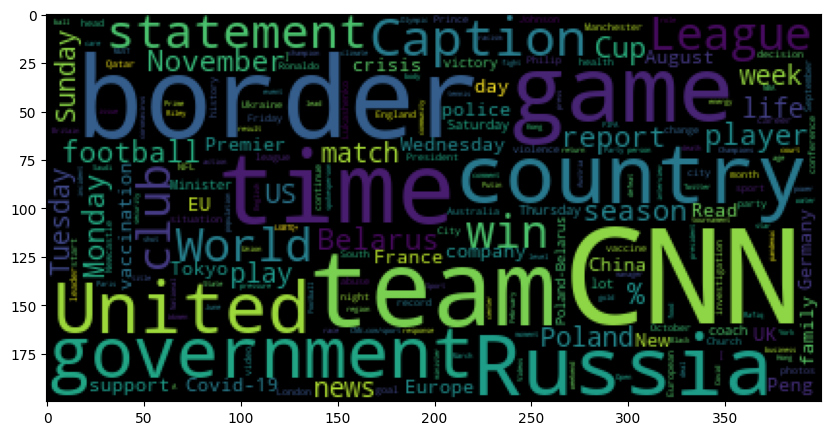

In [19]:
# 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color = 'black')
cloud = wc.generate_from_frequencies(dic)

plt.figure(figsize = (10, 10))
plt.imshow(cloud)

In [17]:
# TF-IDF 적용

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# 데이터 정제: 'Article text' 컬럼에서 내용이 비어있는(NaN) 행을 dropna()를 통해 제거
text = data['Article text'].dropna() 

# CountVectorizer 객체 생성, 문장을 단어 개수로 세어서 행렬로 만들어주는 역할
cv = CountVectorizer()

# DTM(Document-Term Matrix, 문서-단어 행렬) 생성 
# fit_transform은 두 가지 일을 동시에 함.
# - fit: 텍스트에 어떤 단어들이 있는지 학습하여 단어 사전(Vocalbulary)을 만듦.
# - transform: 학습된 사전을 바탕으로 각 문장에 어떤 단어가 몇 번 나왔는지 숫자로 변환함.
dtm = cv.fit_transform(text)

In [21]:
# 희소 행렬(Sparse Matrix)을 일반 배열(Array)로 변환
# dtm은 메모리 절약을 위해 0이 아닌 값만 저장하는 특수한 형태인데, 
# 이를 표로 만들기 위해 모든 숫자가 채워진 일반적인 배열 형태로 바꿈.
dtm_array = dtm.toarray()

#cv.get_feature_names_out(): CountVectorizer가 뽑아낸 단어 목록을 열 이름(헤더)으로 설정
pd.DataFrame(dtm_array, columns = cv.get_feature_names_out())

,00,000,004,007,01,015竊,02,021,03,04,...,혻cnn,혻the,혻this,혻혻la,횁lvaro,횁ngel,횋ric,횜sterreich,횜vp,힋entjo큄t
0,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
import nltk
from nltk.tag import pos_tag
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

words = word_tokenize(text[0])
pos_tag(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('(', '('),
 ('CNN', 'NNP'),
 (')', ')'),
 ('Right', 'RB'),
 ('now', 'RB'),
 (',', ','),
 ('there', 'EX'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('shortage', 'NN'),
 ('of', 'IN'),
 ('truck', 'NN'),
 ('drivers', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('US', 'NNP'),
 ('and', 'CC'),
 ('worldwide', 'NN'),
 (',', ','),
 ('exacerbated', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('e-commerce', 'NN'),
 ('boom', 'NN'),
 ('brought', 'VBN'),
 ('on', 'IN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('pandemic', 'NN'),
 ('.', '.'),
 ('One', 'CD'),
 ('solution', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('problem', 'NN'),
 ('is', 'VBZ'),
 ('autonomous', 'JJ'),
 ('trucks', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('several', 'JJ'),
 ('companies', 'NNS'),
 ('are', 'VBP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('race', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('to', 'TO'),
 ('launch', 'VB'),
 ('one', 'CD'),
 ('.', '.'),
 ('Among', 'IN'),
 ('them', 'PRP'),
 ('is', 'VBZ'),
 ('San', 'NNP'),
 ('Diego-based

In [24]:
# 불용어 처리
#stop = ['the', 'in', 'of', 'at', 'be', '%']
f= open("English_stop_words2.txt", 'rt')
stop = f.read().split('\n')
f.close()

In [26]:
from tqdm import tqdm # FOR문 진행사항 체크용

from nltk.stem import WordNetLemmatizer # 어간처리용 라이브러리

nltk.download('wordnet')
nltk.download('omw-1.4')

lm = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\seonu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
def tokenize(text):
    # retokenize = RegexpTokenizer("[\w]{2,}") # 패턴
    # text = retokenize.tokenize(text) # 3번째 뉴스 기사

    w = word_tokenize(text)

    total = []
    for i in pos_tag(w):
        if i[1] == 'VB' and i[0] not in stop:
           a = lm.lemmatize(i[0], pos='v')
           total.append(a)
        elif i[1] in ['NNP', 'NN'] and i[0] not in stop:
           total.append(i[0])

    return total

In [28]:
total

['CNN',
 'shortage',
 'truck',
 'US',
 'worldwide',
 'e-commerce',
 'boom',
 'pandemic',
 'solution',
 'race',
 'launch',
 'San',
 'TuSimple.Founded',
 'TuSimple',
 'road',
 'prototype',
 'US',
 'China',
 'Europe',
 'technology',
 'TuSimple',
 'truck',
 'Navistar',
 'US',
 'Traton',
 'Volkswagen',
 'trucking',
 'business',
 'Europe',
 'design',
 'build',
 'launch',
 'Yara',
 'Birkeland',
 'zero-emission',
 'cargo',
 'ship',
 'ship',
 'journey',
 'Click',
 'transport',
 'transform',
 'Caption',
 'rendering',
 'Oceanbird',
 'car',
 'carrier',
 'carbon',
 '%',
 'car',
 'carrier.Hide',
 'Caption',
 'maritime',
 'startup',
 'Zeabuz',
 'ferry',
 'rendering',
 'revive',
 'Caption',
 'China',
 'Maglev',
 'high-speed',
 'train',
 'production',
 'Qingdao',
 'China',
 'Shandong',
 'Province',
 'July',
 'speed',
 'hour',
 'ground',
 'vehicle',
 'Hide',
 'Caption',
 'hour',
 'Hyperloop',
 'replacement',
 'Dutch',
 'company',
 'Hardt',
 'rendering',
 'Hyperloop',
 'facility',
 'Europe',
 'Caption',


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 1. CountVectorizer 설정
# tokenizer = tokenize: 이전에 정의한 사용자 정의 토큰화 함수(tokenize)를 사용하여 단어를 쪼개도록 설정
vect = CountVectorizer(tokenizer = tokenize)

# 2. TF-IDF 변환기 생성
# 단어 빈도(TF)를 단어 역지수(IDF)와 곱하여 중요도를 계산하는 도구
transformer = TfidfTransformer()

# 3. 데이터 준비
# 'Article text' 컬럼의 결측치를 제거하고, 분석을 위해 리스트 형태로 변환
Fulltext = list(data['Article text'].dropna())

# 4. 단어 빈도 계산 (DTM 생성)
# 설정한 토큰화 함수를 적용해 문서를 단어 빈도 행렬로 바꿈
X = vect.fit_transform(Fulltext)

# 5. TF-IDF 계산
# 단순 빈도수(X)를 입력받아, 여러 문서에 흔하게 등장하는 단어(the, is 등)의 가중치는 낮추고
# 특정 문서에서만 의미 있게 등장하는 단어의 가중치는 높인 결과(tfidf)를 만듦
tfidf = transformer.fit_transform(X)
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40153 stored elements and shape (400, 11309)>

In [31]:
TfIdf_Result = pd.DataFrame(tfidf.toarray(), columns = vect.get_feature_names_out())
TfIdf_Result.to_csv("TfIdf_Result.csv")
#TfIdf_Result.to_excel("TfIdf_Result.xlsx")
TfIdf_Result

,%,'all,'be,'big,'boxing,'concealment,'disappearance,'diversity,'drop,'gift,...,"짙60,000",짙70,칊s,칢tate,칣he,탈aryn,횁ngel,횜sterreich,횜vp,힋entjo큄t
0,0.094740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.046770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.077031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.070264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
TfIdf_Freq = TfIdf_Result.sum().sort_values(ascending=False)
TfIdf_Freq

team      12.059353
border    11.016669
game      10.337102
cnn        9.096035
league     8.604672
            ...    
dredge     0.008164
벞          0.008164
koki       0.008164
벜          0.008164
벒          0.008164
Length: 11309, dtype: float64

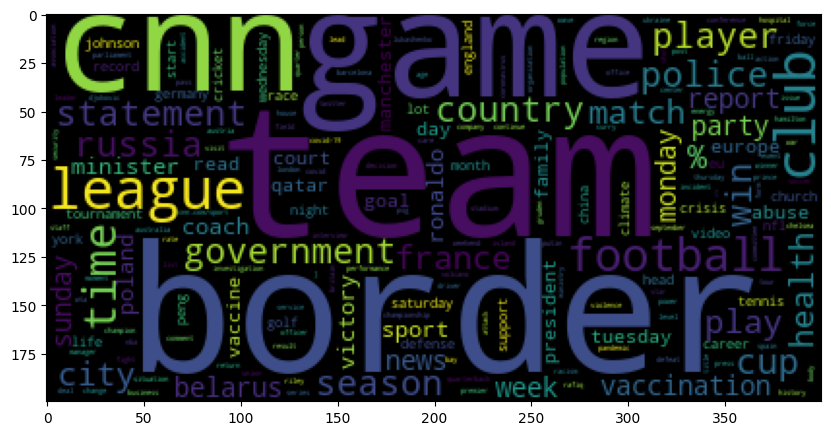

In [33]:
dic2 = {}

for i,j in zip(TfIdf_Freq.index, TfIdf_Freq):
    dic2[i] = j

plt.figure(figsize = (10, 10))
cloud.generate_from_frequencies(dic2)
plt.imshow(cloud)